In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
train=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/train.csv')
test=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/test.csv')
submit=pd.read_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/sample_submission.csv')

In [114]:
train['label']=train['label'].apply(lambda x:'2' if x=='missing' else x)
train['label']=train['label'].apply(lambda x:'10' if x=='NAN' else x)

In [115]:
y=train['label'].astype(int).values
X=train.drop(['id','label'],axis=1).values

In [116]:
X_test=test.drop('id',axis=1).values

In [117]:
# from sklearn.model_selection import train_test_split

# X_tr,X_val,y_tr,y_val=train_test_split(X,y,random_state=71,stratify=y,test_size=0.2)

In [118]:
X_tr = X.astype('float32')/255
# X_val = X_val.astype('float32')/255

In [119]:
X_test=X_test.astype('float32')/255

In [120]:
X_tr = pd.DataFrame(X_tr)
X_ovr = X_tr.values
X_train_ovr = X_ovr.reshape(-1,28,28,1)

In [121]:
X_test = pd.DataFrame(X_test)
X_test = X_test.values
X_test = X_test.reshape(-1,28,28,1)

In [48]:
# X_val_df = pd.DataFrame(X_val)
# X_val_df = X_val_df.values
# X_val_df = X_val_df.reshape(-1,28,28,1)

In [59]:
y

array([2, 9, 6, ..., 5, 2, 7])

In [122]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y)
print(lb.classes_)
y_tr_lb = lb.transform(y)
# y_val_lb = lb.transform(y_val)
y_tr_lb

[ 0  1  2  3  4  5  6  7  8  9 10]


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [146]:
import tensorflow as tf
import keras 
from keras import layers
from keras import models
from keras.layers import *
model1 = models.Sequential()
model1.add(layers.Conv2D(16,(3,3),activation='relu',input_shape = (28,28,1),name='conv2d_layer1'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3),activation='relu',name='conv2d_layer2'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128,(3,3),activation='relu',name='conv2d_layer3'))
model1.add(layers.Flatten())
model1.add(Dense(64,activation = 'relu'))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(11,activation='softmax'))

In [147]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer1 (Conv2D)       (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_layer2 (Conv2D)       (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_layer3 (Conv2D)       (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_14 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)              

In [148]:
Adam=tf.keras.optimizers.Adam(
    learning_rate=0.01,epsilon=1e-1, amsgrad=False,name='Adam')
model1.compile(
    optimizer=Adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

y_pred_tr=model1.fit(X_train_ovr,y_tr_lb,epochs=15,batch_size=32,validation_split=0.2)

Epoch 1/15
846/846 [==============================] - 24s 28ms/step - loss: 1.3748 - accuracy: 0.4813 - val_loss: 0.5403 - val_accuracy: 0.7832
Epoch 2/15
846/846 [==============================] - 23s 28ms/step - loss: 0.5529 - accuracy: 0.7850 - val_loss: 0.4657 - val_accuracy: 0.8228
Epoch 3/15
846/846 [==============================] - 23s 28ms/step - loss: 0.4376 - accuracy: 0.8355 - val_loss: 0.3604 - val_accuracy: 0.8666
Epoch 4/15
846/846 [==============================] - 23s 28ms/step - loss: 0.3825 - accuracy: 0.8602 - val_loss: 0.3352 - val_accuracy: 0.8805
Epoch 5/15
846/846 [==============================] - 24s 28ms/step - loss: 0.3486 - accuracy: 0.8699 - val_loss: 0.3185 - val_accuracy: 0.8805
Epoch 6/15
846/846 [==============================] - 24s 28ms/step - loss: 0.3155 - accuracy: 0.8827 - val_loss: 0.3433 - val_accuracy: 0.8756
Epoch 7/15
846/846 [==============================] - 24s 28ms/step - loss: 0.2906 - accuracy: 0.8943 - val_loss: 0.3093 - val_accuracy:

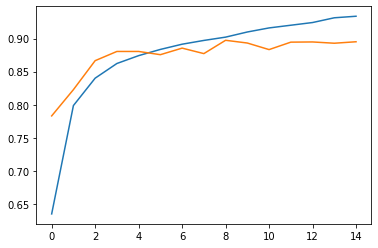

In [156]:
try:
    plt.plot(y_pred_tr.history['accuracy'])
    plt.plot(y_pred_tr.history['val_accuracy'])
except KeyError:
 plt.plot(y_pred_tr.history['accuracy'])
 plt.plot(y_pred_tr.history['val_accuracy'])
 plt.title('Accuracy vs. epochs')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(['Training'], loc='lower right')
 plt.show() 

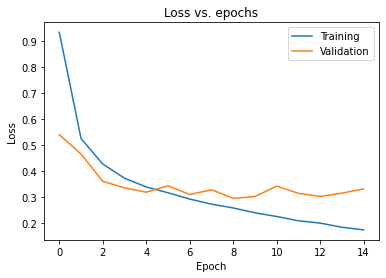

In [157]:
plt.plot(y_pred_tr.history['loss'])
plt.plot(y_pred_tr.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [158]:
y_pred = model1.predict(X_test, batch_size=32)
y_pred1 =lb.inverse_transform(y_pred)
y_pred1

array([8, 2, 4, ..., 5, 4, 1])

In [159]:
submit['label']=y_pred1
submit

,id,label
0,11,8
1,15,2
2,17,4
3,21,7
4,22,4
...,...,...
8455,59970,7
8456,59971,5
8457,59982,5
8458,59986,4


In [160]:
submit['label']=submit['label'].apply(lambda x:'missing' if x=='2' else x)
submit['label']=submit['label'].apply(lambda x:'NAN' if x=='10' else x)

In [163]:
submit.head(100)

,id,label
0,11,8
1,15,2
2,17,4
3,21,7
4,22,4
...,...,...
95,599,6
96,602,0
97,606,4
98,608,4


In [162]:
CNN_submit =submit.to_csv('/content/drive/MyDrive/캐글스터디/SJU_Challange_MNIST/CNN1.csv',index=False)